# Concise Implementation of Linear Regression

## Generating Data Sets

In [40]:
import torch
import numpy as np
def synthetic_data(w, b, num_examples):
    '''generate y = Xw + b + noise'''
    X = np.random.normal(scale=1, size=(num_examples, len(w)))
    y = np.dot(X, w) + b
    y += np.random.normal(scale=0.01, size=y.shape)
    X = torch.from_numpy(X).float()
    y = torch.from_numpy(y).float().reshape(-1, 1)
    return X, y

true_w = torch.Tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

## Reading Data

In [41]:
from torch.utils.data import TensorDataset, DataLoader
def load_array(data_arrays, batch_size, is_train=True):
#     dataset = TensorDataset(*(data_arrays[0], data_arrays[1]))
#     dataset = TensorDataset(*(features, labels))
    dataset = TensorDataset(*data_arrays)
    dataloader = DataLoader(dataset=dataset, batch_size=batch_size, shuffle=True)
    return dataloader
batch_size = 10
data_iter = load_array((features, labels), batch_size)

In [42]:
for X, y in data_iter:
    print(X)
    print(y)
    break

tensor([[-0.6933, -1.2422],
        [-2.5412,  2.4775],
        [ 1.0026,  0.0313],
        [-0.5545, -0.0290],
        [-0.9604, -1.0793],
        [-0.0232,  1.3640],
        [-0.0653, -1.7133],
        [-1.1517, -0.8940],
        [ 0.0271, -0.7898],
        [ 0.5800, -0.1857]])
tensor([[ 7.0512],
        [-9.3252],
        [ 6.1116],
        [ 3.1773],
        [ 5.9540],
        [-0.4770],
        [ 9.9026],
        [ 4.9418],
        [ 6.9403],
        [ 5.9947]])


## Define the Model

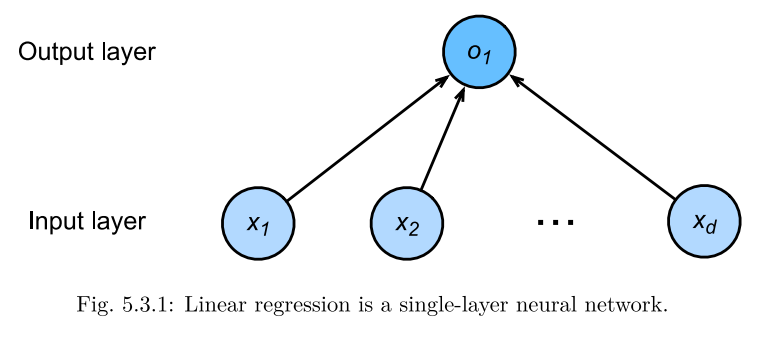

In [43]:
from IPython.display import Image
Image('../img/linear_regression_is_single_layer_neural_network.png')

class LinearRegressionModel(torch.nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.layer1 = torch.nn.Linear(2, 1, bias=True)
    def forward(self, x):
        y_pred = self.layer1(x)
        return y_pred
    
net = LinearRegressionModel()

## Initialize Model Parameters

In [44]:
net.layer1.weight.data = torch.Tensor(np.random.normal(size=(1,2), scale=0.01, loc=0))
net.layer1.bias.data = torch.Tensor([0])

## Define the Loss Function

In [45]:
loss = torch.nn.MSELoss(reduction='sum')

## Define the Optimization Algorithm

In [46]:
trainer = torch.optim.SGD(net.parameters(), lr=0.03)

## Training

In [48]:
num_epochs = 10
for epoch in range(num_epochs):
    for X, y in data_iter:
        l = loss(net(X), y)
        trainer.zero_grad()
        l.backward()
        trainer.step()
    l_epoch = loss(net(features), labels)
    print('epoch {}, loss {}'.format(epoch+1, l_epoch))


epoch 1, loss 0.1084081381559372
epoch 2, loss 0.13378722965717316
epoch 3, loss 0.12211962789297104
epoch 4, loss 0.11337442696094513
epoch 5, loss 0.11445146054029465
epoch 6, loss 0.11280595511198044
epoch 7, loss 0.1086336225271225
epoch 8, loss 0.1173924133181572
epoch 9, loss 0.15092869102954865
epoch 10, loss 0.11354662477970123
